Adınız:Sinem
Soyadınız:Doğan
Okul Numaranız:2312721027
GitHub Repo Bağlantısı: https://github.com/snmmdogann/genetik_optimizasyonu

# Genetik Algoritma ile Optimizasyon – Senaryo 7
Bu çalışma, Biyoteknoloji firması için numune karışımının (x1, x2) optimize edilmesi amacıyla Genetik Algoritma uygulanarak yapılmıştır. 
Amaç fonksiyonu ve kısıtlar senaryo gereği belirlenmiştir.
## Problemin Tanımı
Amaç fonksiyonu:

\[
y = 3x_1 + 2x_2 + x_1x_2 - 0.5x_2^2
\]

Değişkenler:
- x1: Reaktif A (%10–80)
- x2: Reaktif B (%10–80)

Kısıtlar:
- \( x_1 + x_2 \le 100 \)
- \( x_1 \ge 25 \)

Amaç: **y değerini maksimize eden x1 ve x2'yi bulmak**


## Gerekli Kütüphanelerin Yüklenmesi
Bu bölümde rastgele sayı üretimi, matematiksel işlemler ve grafik çizimleri için gerekli kütüphaneler yüklenmektedir.


In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt


## Amaç Fonksiyonu
Bu fonksiyon çözeltinin test hassasiyet puanını hesaplar. Genetik algoritmada fitness değeri olarak kullanılır.

In [2]:
def objective_function(x1, x2):
    return 3*x1 + 2*x2 + x1*x2 - 0.5*(x2**2)


## Kısıt Fonksiyonu
Bu fonksiyon bireyin belirtilen kısıtlara uygun olup olmadığını kontrol eder. 
Uygun olmayan bireyler popülasyona eklenmez.


In [3]:
def constraints_ok(x1, x2):
    if x1 < 25: 
        return False
    if x1 < 10 or x1 > 80: 
        return False
    if x2 < 10 or x2 > 80: 
        return False
    if x1 + x2 > 100:
        return False
    return True


## Başlangıç Popülasyonunun Oluşturulması
Popülasyon, rastgele fakat kısıtlara uygun bireylerden oluşturulur. 
Her birey `[x1, x2]` şeklindedir.


In [4]:
def create_individual():
    while True:
        x1 = random.uniform(10, 80)
        x2 = random.uniform(10, 80)
        if constraints_ok(x1, x2):
            return [x1, x2]

def create_population(size):
    return [create_individual() for _ in range(size)]


## Fitness Fonksiyonu
Fitness, bireyin amaç fonksiyonundaki başarısını gösterir. 
Değer ne kadar yüksekse birey o kadar iyidir.


In [5]:
def fitness(individual):
    return objective_function(individual[0], individual[1])


## Seçilim Mekanizması – Turnuva Seçimi
Bu yöntemde popülasyondan rastgele seçilen bireyler arasında "mini yarış" yapılır. 
Fitness değeri en yüksek olan ebeveyn olur.


In [6]:
def tournament_selection(population, k=3):
    selected = random.sample(population, k)
    selected.sort(key=lambda ind: fitness(ind), reverse=True)
    return selected[0]


## Çaprazlama (Crossover)
Ebeveynlerden iki yeni çocuk üretmek için lineer karışım yöntemi kullanılır. 
Çocuk bireyler kısıtları sağlamıyorsa yeniden üretilir.


In [7]:
def crossover(parent1, parent2):
    alpha = random.random()
    child1 = [alpha*parent1[0] + (1-alpha)*parent2[0],
              alpha*parent1[1] + (1-alpha)*parent2[1]]
    child2 = [(1-alpha)*parent1[0] + alpha*parent2[0],
              (1-alpha)*parent1[1] + alpha*parent2[1]]

    if not constraints_ok(child1[0], child1[1]):
        child1 = create_individual()
    if not constraints_ok(child2[0], child2[1]):
        child2 = create_individual()

    return child1, child2


## Mutasyon
Mutasyon, popülasyonun çeşitliliğini arttırmak için küçük rastgele değişiklikler uygular. 
Kısıtları bozan bireyler yeniden oluşturulur.


In [8]:
def mutate(individual, mutation_rate=0.1):
    if random.random() < mutation_rate:
        individual[0] += random.uniform(-5, 5)
        individual[1] += random.uniform(-5, 5)

    if not constraints_ok(individual[0], individual[1]):
        return create_individual()
    
    return individual


## Genetik Algoritmanın Çalıştırılması
Bu adımda:
- Seçilim
- Çaprazlama
- Mutasyon
- Yeni popülasyon oluşturulması
- En iyi bireyin kaydedilmesi

gibi tüm GA adımları 80 jenerasyon boyunca çalıştırılır.


In [9]:
def genetic_algorithm(pop_size=40, generations=80):
    population = create_population(pop_size)
    best_values = []

    for gen in range(generations):
        new_population = []

        for _ in range(pop_size // 2):
            p1 = tournament_selection(population)
            p2 = tournament_selection(population)

            c1, c2 = crossover(p1, p2)
            c1 = mutate(c1)
            c2 = mutate(c2)

            new_population.append(c1)
            new_population.append(c2)

        population = new_population

        best_ind = max(population, key=lambda ind: fitness(ind))
        best_values.append(fitness(best_ind))

        print(f"Generasyon {gen+1}: En iyi çözüm = {fitness(best_ind):.3f}")

    final_best = max(population, key=lambda ind: fitness(ind))
    return final_best, best_values


## En İyi Çözümün Hesaplanması
Aşağıdaki kod GA'yı çalıştırır ve en iyi çözümü ekrana yazdırır.


In [10]:
best_solution, best_graph = genetic_algorithm()

print("\n--- EN İYİ ÇÖZÜM ---")
print("x1:", best_solution[0])
print("x2:", best_solution[1])
print("En yüksek y:", fitness(best_solution))


Generasyon 1: En iyi çözüm = 1906.947
Generasyon 2: En iyi çözüm = 1857.888
Generasyon 3: En iyi çözüm = 1794.687
Generasyon 4: En iyi çözüm = 1788.267
Generasyon 5: En iyi çözüm = 1788.050
Generasyon 6: En iyi çözüm = 1787.381
Generasyon 7: En iyi çözüm = 1891.330
Generasyon 8: En iyi çözüm = 1880.140
Generasyon 9: En iyi çözüm = 1879.171
Generasyon 10: En iyi çözüm = 1928.656
Generasyon 11: En iyi çözüm = 1928.094
Generasyon 12: En iyi çözüm = 1926.141
Generasyon 13: En iyi çözüm = 1925.746
Generasyon 14: En iyi çözüm = 1923.813
Generasyon 15: En iyi çözüm = 1922.750
Generasyon 16: En iyi çözüm = 1922.666
Generasyon 17: En iyi çözüm = 1925.830
Generasyon 18: En iyi çözüm = 1925.918
Generasyon 19: En iyi çözüm = 1925.919
Generasyon 20: En iyi çözüm = 1925.921
Generasyon 21: En iyi çözüm = 1925.979
Generasyon 22: En iyi çözüm = 1925.978
Generasyon 23: En iyi çözüm = 1925.978
Generasyon 24: En iyi çözüm = 1925.978
Generasyon 25: En iyi çözüm = 1925.978
Generasyon 26: En iyi çözüm = 1925

## Fitness Evrim Grafiği
Bu grafik, jenerasyonlar boyunca en iyi fitness değerinin nasıl değiştiğini gösterir. 
Genetik algoritmanın doğru çalıştığını doğrulamak için kullanılır.


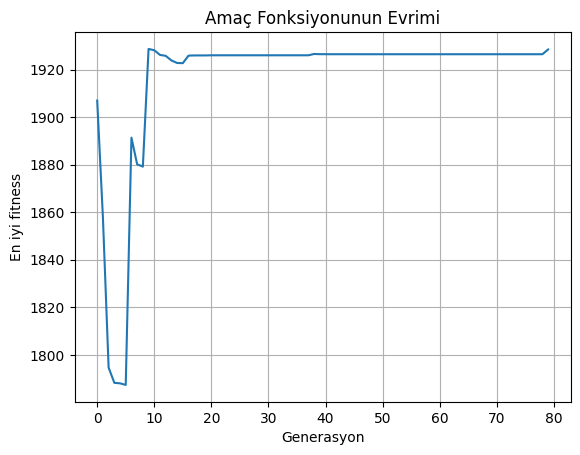

In [11]:
plt.plot(best_graph)
plt.xlabel("Generasyon")
plt.ylabel("En iyi fitness")
plt.title("Amaç Fonksiyonunun Evrimi")
plt.grid(True)
plt.show()
